Identificación de Sistemas
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema

Cuando un sistema desconocido es excitado mediante una señal de entrada $z(k)$ se produce una señal de salida $d(k)$. El diagrama del sistema aparece en la figura de abajo. Para efectos de control se requiere un modelo que permita pronosticar el valor de $d(k)$ a partir del valor actual y los valores pasados de la señal de entrada $z(k)$, $z(k-1)$, $z(k-2)$, ... El diagrama ilustrativo es presentado a continuación.



![alt](images/AdalineIdentificacion-01.png)

Por facilidad se supondra que la dinámica del sistema desconocido es descrita por siguiente ecuación no lineal:

$$d_t = 0.4 + 0.1 z_{t} + 0.9 z_{t-1} - 0.6 z_{t-2} - 0.2 z_{t-1}^2 + u_t$$

donde $u_t$ es una variable aleatoria normal con $\mu=0$ y $\sigma = 0.05$.  $z_t$ es una variable aleatoria uniforme en el intervalo $[0,1]$. A continuación se generan las series.

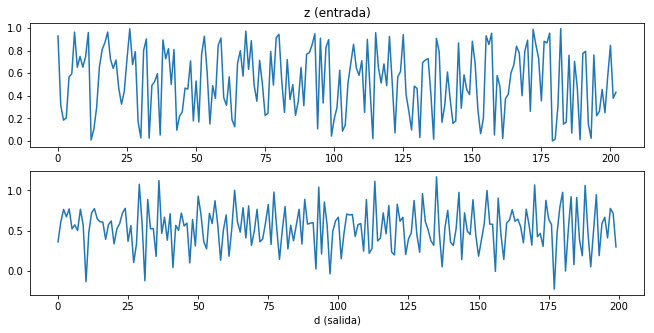

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

np.random.seed(12345)
z = np.random.uniform(size=203)
d = 0.05 * np.random.standard_normal(203)

for t in range(2, 203):
    d[t] = d[t] + 0.4 + 0.1 * z[t] + 0.9 * z[t-1] - 0.6 * z[t-2] - 0.2 * z[t-1]**2  

d = d[3:203]

plt.figure(figsize=(11,5))
plt.subplot(2, 1, 1)
plt.plot(z)
plt.title('z (entrada)')
plt.subplot(2, 1, 2)
plt.plot(d);
plt.xlabel('d (salida)');

# Metodología de Solución

Para solucionar este problema se usará un ADALINE. Ya que las propieades del sistema no cambian en el tiempo,se puede calcular la corrección neta de los pesos. La modificación del algoritmo de aprendizaje es descrito a continuación.

El algoritmo $\mu$-LMS, o regla delta, puede ser derivado para la sumatoria del error cuadrático medio:

$$E_\text{square}(\mathbf{w}) = 
\sum_{p=1}^P \left[ d(p) - \sum_{i=0}^n w_i x_i (p) \right]^2
$$

Entonces:

$$
\frac{\partial}{\partial w_i} E_\text{square} = 
-2 \sum_{p=1}^P x_i (p) [d(p) - y(p)] = 
-2 \sum_{p=1}^P x_i(p) e_l(p)
$$

De esta forma, el proceso iterativo puede escribirse como:

$$
\mathbf{w}(k+1) = 
\mathbf{w}(k) - \mu \frac{\partial }{\partial \mathbf{w} (k)} E_\text{square}(\mathbf{w}) = 
\mathbf{w}(k) + 2 \mu \sum_{p=1}^P e_l(p) \mathbf{x}(p) 
$$

La diferencia de esta fórmula

![alt](images/AdalineIdentificacion-02.png)

### Solución al problema propuesto

---
**Ejercicio.--** Implemente la solución al problema propuesto usando `numpy`.

---
**Ejercicio.--** Implemente la solución al problema propuesto usando `TensorFlow`.

---

Identificación de Sistemas
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 